In [39]:
import Model.BandaiDataset as bd

In [40]:
MODEL_DIR = "./saved_models"
DATASET_DIR = "./datasets/data/"
FILELIST_PATH = "datafiles.txt"

In [41]:
dataset = bd.BandaiDataset(FILELIST_PATH)

In [6]:
import torch
set_frame = 50
def custom_collate_fn(batch):
    motion_batch_tensor = torch.FloatTensor(len(batch),50,480,640)
    motion_tensors = []
    labels = []
    #print(type(batch))

    for item in batch:
        #print(item)
        motion_tensor = item.get_motion_tensor(50) # load an motion as a tensor(frames,width,height)
        motion_tensors.append(motion_tensor.unsqueeze(0)) # put motions into a list : to be checked 
        labels.append(item.label)

    torch.cat(motion_tensors, out=motion_batch_tensor)
    label_batch_tensor = torch.LongTensor(labels)
    return (motion_batch_tensor,label_batch_tensor)

In [7]:
from torch.utils.data import DataLoader, random_split
import multiprocessing as mp

def load_data(file_list_path= '', data_path='', batch_sz = 5, train_val_test_split = [0.7,0.1,0.2]):
    assert sum(train_val_test_split) == 1, "Train, val and test fractions should sum to 1!" 
    dataset = bd.BandaiDataset(data_path)
    dataset.load()

    tr_va_te = []
    n_cpus = mp.cpu_count()
    
    for frac in train_val_test_split:
        num = round(frac * dataset.num_of_files)
        tr_va_te.append(num)
    
    if tr_va_te[0] != (dataset.num_of_files - tr_va_te[1] - tr_va_te[2]):
        tr_va_te[0] = (dataset.num_of_files - tr_va_te[1] - tr_va_te[2])
    
    #assert 1==2, f"tr_va_te = {tr_va_te}"

    train_split, val_split, test_split = random_split(dataset, tr_va_te)

    train_dl = DataLoader(train_split,
                          batch_size=batch_sz,
                          shuffle=True,
                          collate_fn=custom_collate_fn,
                          num_workers=n_cpus
                        )
    val_dl = DataLoader(val_split,
                        batch_size=batch_sz,
                        shuffle=True,
                        collate_fn=custom_collate_fn,
                        num_workers=n_cpus)
    test_dl = DataLoader(test_split,
                         batch_size=batch_sz,
                         shuffle=True,
                         collate_fn=custom_collate_fn,
                         num_workers=n_cpus)

    return train_dl, val_dl, test_dl

In [8]:
train_dl, val_dl, test_dl = load_data()

In [9]:
train_motions, _ = next(iter(train_dl))

In [10]:
test_motions,test_labels = next(iter(test_dl))

In [11]:
'''
for (motion_batch,label_batch) in train_dl:
    batch_sz = len(motion_batch)
    print(batch_sz)
'''

'\nfor (motion_batch,label_batch) in train_dl:\n    batch_sz = len(motion_batch)\n    print(batch_sz)\n'

In [12]:
import numpy as np
print(np.size(dataset[164].pose_list[0]))
print(dataset[164].frame_num)
#tensor = np.array(dataset[54].pose_list)
for pose in dataset[54].pose_list:
    print(np.size(pose))

307200
227
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200
307200


In [13]:
print(len(dataset.filelist))
print(dataset.filelist[164])
dataset.num_of_files


165
dataset-1_walk_tired_002


165

In [14]:
for i in range(0,165):
    print(f'{i}: {dataset[i].frame_num} ->' ,end='')
    tensor = dataset[i].get_motion_tensor(50)
    print({dataset[i].frame_num},flush=True)

0: 129 ->{50}
1: 91 ->{50}
2: 99 ->{50}
3: 118 ->{50}
4: 219 ->{50}
5: 123 ->{50}
6: 139 ->{50}
7: 71 ->{50}
8: 157 ->{50}
9: 139 ->{50}
10: 146 ->{50}
11: 173 ->{50}
12: 138 ->{50}


13: 222 ->{50}
14: 166 ->{50}
15: 230 ->{50}
16: 56 ->{50}
17: 170 ->{50}
18: 150 ->{50}
19: 85 ->{50}
20: 236 ->{50}
21: 221 ->{50}
22: 202 ->{50}
23: 158 ->{50}
24: 122 ->{50}
25: 141 ->{50}
26: 123 ->{50}
27: 80 ->{50}
28: 235 ->{50}
29: 304 ->{50}
30: 186 ->{50}
31: 111 ->{50}
32: 124 ->{50}
33: 131 ->{50}
34: 329 ->{50}
35: 143 ->{50}
36: 224 ->{50}
37: 213 ->{50}
38: 188 ->{50}
39: 112 ->{50}
40: 209 ->{50}
41: 142 ->{50}
42: 174 ->{50}
43: 254 ->{50}
44: 211 ->{50}
45: 86 ->{50}
46: 75 ->{50}
47: 76 ->{50}
48: 70 ->{50}
49: 98 ->{50}
50: 68 ->{50}
51: 118 ->{50}
52: 71 ->{50}
53: 68 ->{50}
54: 21 ->{50}
55: 100 ->{50}
56: 86 ->{50}
57: 106 ->{50}
58: 82 ->{50}
59: 94 ->{50}
60: 141 ->{50}
61: 111 ->{50}
62: 120 ->{50}
63: 187 ->{50}
64: 301 ->{50}
65: 164 ->{50}
66: 106 ->{50}
67: 153 ->{50}
68: 201 ->{50}
69: 87 ->{50}
70: 163 ->{50}
71: 216 ->{50}
72: 114 ->{50}
73: 164 ->{50}
74: 83 ->{50}
75: 73 ->{50}
76: 78 ->{50}
77: 112 ->{50}
78: 71 ->{50}
79: 121 ->{50}
80: 80 ->{50}
8

In [15]:
import torchmetrics.classification as tmcls 
class ClassifierMetrics(object):
    ap: float
    precision: float
    recall: float
    f1: float
    acc: float
    count: int

    def __init__(self, task, n_labels, device):
        self.task = task
        if self.task == "multiclass":
            self.ap_metric = tmcls.MulticlassAveragePrecision(num_classes=n_labels, average=None, thresholds=None).to(device)
            self.precision_metric = tmcls.MulticlassPrecision(num_classes=n_labels).to(device)
            self.recall_metric = tmcls.MulticlassRecall(num_classes=n_labels).to(device)
            self.f1_metric = tmcls.MulticlassF1Score(num_classes=n_labels).to(device)
            self.acc_metric = tmcls.MulticlassAccuracy(num_classes=n_labels).to(device)

        elif self.task == "multilabel":
            self.ap_metric = tmcls.MultilabelAveragePrecision(num_labels=n_labels, average=None, thresholds=None).to(device)
            self.precision_metric = tmcls.MultilabelPrecision(num_labels=n_labels).to(device)
            self.recall_metric = tmcls.MultilabelRecall(num_labels=n_labels).to(device)
            self.f1_metric = tmcls.MultilabelF1Score(num_labels=n_labels).to(device)
            self.acc_metric = tmcls.MultilabelAccuracy(task=self.task, num_labels=n_labels).to(device)
        self.reset()
    

    def reset(self):
        self.ap = 0
        self.precision = 0
        self.recall = 0
        self.f1 = 0
        self.acc = 0
        self.count = 0

    def update(self, y_pred, y):
        y = y.long()
        self.ap += self.ap_metric(y_pred, y)
        self.precision += self.precision_metric(y_pred, y)
        self.recall += self.recall_metric(y_pred, y)
        self.f1 += self.f1_metric(y_pred, y)
        self.acc += self.acc_metric(y_pred, y)
        self.count += 1 #y.size(0)

    def calc(self, y_pred, y):
        self.reset()
        y = y.long()
        self.ap = self.ap_metric(y_pred, y)
        self.precision = self.precision_metric(y_pred, y)
        self.recall = self.recall_metric(y_pred, y)
        self.f1 = self.f1_metric(y_pred, y)

    def avg(self):
        self.ap = self.ap / self.count
        self.precision = self.precision / self.count
        self.recall = self.recall / self.count
        self.f1 = self.f1 / self.count
        self.acc = self.acc / self.count

In [16]:
import torch.nn as nn
from torchsummary import summary

class ConvNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=50, out_channels=50, kernel_size=5, stride=1, padding=2) #[(dimension_sz−kernel+2*Padding)/Stride]+1
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)

        self.conv2 = nn.Conv2d(in_channels=50, out_channels=50, kernel_size=5, stride=1, padding=2) #[(dimension_sz−kernel+2*Padding)/Stride]+1
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)  
##########
        '''
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=5, stride=1, padding=2) #[(dimension_sz−kernel+2*Padding)/Stride]+1
        self.relu3 = nn.ReLU()
        '''
        #self.pool3 = nn.MaxPool2d(kernel_size=2)  
        
        self.flat = nn.Flatten()            
        self.fc1 = nn.Linear(50 * 160 * 120, 128)   
        self.relu4 = nn.ReLU()

        self.fc2 = nn.Linear(128, 256)
        self.relu5 = nn.ReLU()

        self.fc3 = nn.Linear(256, 64)
        self.relu6 = nn.ReLU()

        self.fc4 = nn.Linear(64, 10)

    def forward(self, inp):
        inp = self.conv1(inp)
        inp = self.relu1(inp) 
        inp = self.pool1(inp)

        inp = self.conv2(inp)
        inp = self.relu2(inp) 
        inp = self.pool2(inp)
        '''
        inp = self.conv3(inp)
        inp = self.relu3(inp) 
        '''
        #inp = self.pool3(inp)
        

        inp = self.flat(inp)

        inp = self.fc1 (inp) 
        inp = self.relu4(inp)            
        inp = self.fc2(inp) 
        inp = self.relu5(inp)
        inp = self.fc3(inp) 
        inp = self.relu6(inp)
        out = self.fc4(inp)
        return out
    

def get_simple_conv_net():
    return ConvNet()

summary(get_simple_conv_net(), input_size=(50, 640, 480), device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 50, 640, 480]          62,550
              ReLU-2         [-1, 50, 640, 480]               0
         MaxPool2d-3         [-1, 50, 320, 240]               0
            Conv2d-4         [-1, 50, 320, 240]          62,550
              ReLU-5         [-1, 50, 320, 240]               0
         MaxPool2d-6         [-1, 50, 160, 120]               0
           Flatten-7               [-1, 960000]               0
            Linear-8                  [-1, 128]     122,880,128
              ReLU-9                  [-1, 128]               0
           Linear-10                  [-1, 256]          33,024
             ReLU-11                  [-1, 256]               0
           Linear-12                   [-1, 64]          16,448
             ReLU-13                   [-1, 64]               0
           Linear-14                   

In [17]:
def train_model(model,epochs,train_dl,optimiser, device):
    msg = ""
    for epoch in range (epochs):
        total_steps = len(train_dl)
        correct = 0
        total = 0
        model.train()
        for batch_num, (motion_batch, label_batch) in enumerate(train_dl):
            batch_sz = len(motion_batch)
            motion_batch  = motion_batch.to(device)
            label_batch = label_batch.to(device)
            output = model(motion_batch)
            losses = nn.CrossEntropyLoss()(output, label_batch)
            optimiser.zero_grad()
            losses.backward
            optimiser.step()

            preds = torch.argmax(output,dim=1)
            correct += int(torch.eq(preds,label_batch).sum())
            total += batch_sz
            minibatch_accuracy = 100 * correct/total

            #### Fancy printing stuff, you can ignore this! ######
            if (batch_num + 1) % 5 == 0:
                print(" " * len(msg), end='\r')
                msg = f'Train epoch[{epoch+1}/{epochs}], MiniBatch[{batch_num + 1}/{total_steps}], Loss: {losses.item():.5f}, Acc: {minibatch_accuracy:.5f}'
                print (msg, end='\r' if epoch < epochs else "\n",flush=True)
            #### Fancy printing stuff, you can ignore this! ######
                
            

In [18]:
from torch.optim import SGD

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)
epochs = 50
batch_sz = 16
learning_rate = 0.00005
train_dl, val_dl, test_dl = load_data(batch_sz=batch_sz)
network = get_simple_conv_net().to(DEVICE)
optim = SGD(network.parameters(),lr=learning_rate)



cuda


In [19]:
#train_model(network,epochs,train_dl,optim, DEVICE)

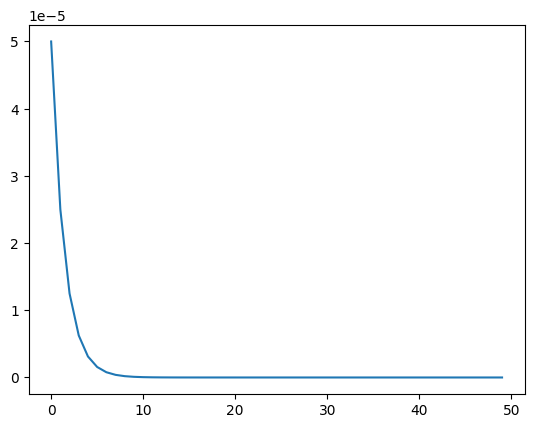

In [20]:
from torch.optim.lr_scheduler import ExponentialLR
from matplotlib import pyplot as plt

model  = get_simple_conv_net()
optimizer = SGD(model.parameters(), lr = learning_rate)
gamma = 0.5
schd = ExponentialLR(optimizer, gamma)

lrs = []
for i in range (epochs):
    optimizer.step()
    lrs.append(schd.get_last_lr())
    schd.step()

plt.plot(lrs)

In [21]:
dataloaders = {
    'train' : train_dl,
    'val' : val_dl,
    'test' :test_dl
}

def train_model_gpu_lr_conv_valid(model, epochs, dataloaders, optimiser, lr_scheduler):
    msg = ''
    for epoch in range(epochs):
        ################ TRAINING ################
        model.train()
        train_dl = dataloaders["train"]
        correct_train = 0
        total_train = 0

        for batch_num, (motion_batch, label_batch) in enumerate(train_dl):
            batch_sz = len(motion_batch)
            label_batch = label_batch.to(DEVICE)
            motion_batch = motion_batch.to(DEVICE)
            output = model(motion_batch)
            losses = nn.CrossEntropyLoss()(output, label_batch)

            optimiser.zero_grad()
            losses.backward()
            optimiser.step()

            preds_train = torch.argmax(output, dim=1)
            correct_train += int(torch.eq(preds_train, label_batch).sum())
            total_train +=batch_sz
            minibatch_accuracy_train = 100 * correct_train / total_train

            #### Fancy printing stuff, you can ignore this! ######
            if (batch_num + 1) % 5 == 0:
                print(" " * len(msg), end='\r')
                msg = f'Train epoch[{epoch+1}/{epochs}], MiniBatch[{batch_num + 1}/{total_train}], Loss: {losses.item():.5f}, Acc: {minibatch_accuracy_train:.5f}, LR: {lr_scheduler.get_last_lr()[0]:.5f}'
                print (msg, end='\r' if epoch < epochs else "\n",flush=True)
            #### Fancy printing stuff, you can ignore this! ######
        lr_scheduler.step()

        ##############################################################
        print("") # Create newline between progress bars
        ##############################################################

        model.eval()
        val_dl = dataloaders["val"]
        total_val = len(val_dl)
        correct_val = 0
        total_val = 0

        for batch_num, (motion_batch, label_batch) in enumerate(val_dl):
            batch_sz = len(motion_batch)
            label_batch = label_batch.to(DEVICE)
            motion_batch = motion_batch.to(DEVICE)
            with torch.no_grad():
                output = model(motion_batch)
                losses = nn.CrossEntropyLoss()(output, label_batch)
                preds_val = torch.argmax(output, dim=1)
                correct_val += int(torch.eq(preds_val, label_batch).sum())
                total_val += batch_sz
                minibatch_accuracy_val = 100 * correct_val / total_val
            #### Fancy printing stuff, you can ignore this! ######
            #if (batch_num + 1) % 5 == 0:
            print(" " * len(msg), end='\r')
            msg = f'Val epoch[{epoch+1}/{epochs}], MiniBatch[{batch_num + 1}/{total_val}], Loss: {losses.item():.5f}, Acc: {minibatch_accuracy_val:.5f}, LR: {lr_scheduler.get_last_lr()[0]:.5f}'
            print (msg, end='\r' if epoch < epochs else "\n",flush=True)
            #### Fancy printing stuff, you can ignore this! ######
     
        ########################################################################
        print("")  # Create newline between progress bars

In [22]:
# instantiate simple conv net
network = get_simple_conv_net()
# instantiate SGD optimiser
optim = SGD(network.parameters(),lr = learning_rate)
# instantiate exponential learning rate scheduler
lr_sch = ExponentialLR(optim,gamma)
# move model to DEVICE
network = network.to(DEVICE)
# call latest training function
train_model_gpu_lr_conv_valid(network,epochs,dataloaders,optim,lr_sch)

Train epoch[1/50], MiniBatch[5/80], Loss: 3.24829, Acc: 13.75000, LR: 0.00005
Val epoch[1/50], MiniBatch[1/16], Loss: 3.56038, Acc: 12.50000, LR: 0.00003  
Train epoch[2/50], MiniBatch[5/80], Loss: 2.44013, Acc: 12.50000, LR: 0.00003
Val epoch[2/50], MiniBatch[1/16], Loss: 2.47062, Acc: 12.50000, LR: 0.00001  


KeyboardInterrupt: 

In [24]:
class EarlyStopper:
    def __init__(self, patience =  1, tolerance = 0):
        self.patience = patience
        self.tolerance = tolerance

        self.epoch_counter = 0
        self.max_validation_acc = np.NINF

    def should_stop(self, validation_acc):
        if validation_acc > self.max_validation_acc:
            self.max_validation_acc = validation_acc
            self.epoch_counter = 0
        elif validation_acc < (self.max_validation_acc - self.tolerance):
            self.epoch_counter += 1
            if(self.epoch_counter >= self.patience):
                return True
        return False

In [25]:
from torch.utils.tensorboard import SummaryWriter

In [26]:
import os
CHECKPOINT_DIR = './checkpoints'
def save_checkpoint(model, epoch, save_dir):
    filename = f"checkout_{epoch}.pth"
    save_path = f"{save_dir}/{filename}"
    torch.save(model.state_dict(), save_path)

In [31]:
def train_model_final(model, epochs, dataloders,
                      optimizer, lr_scheduler, writer,
                      early_stopper,checkpoint_frequency):
    msg = ""
    for epoch in range(epochs):
        ################# TRAINING ####################
        model.train()
        train_dl = dataloaders['train']

        total_steps_train = len(train_dl)
        correct_train = 0
        total_train = 0
        loss_train = 0

        for batch_num, (motion_batch, label_batch) in enumerate(train_dl):
            batch_sz = len(motion_batch)
            label_batch = label_batch.to(DEVICE)
            motion_batch = motion_batch.to(DEVICE)
            output = model(motion_batch)
            loss_train = nn.CrossEntropyLoss()(output, label_batch)

            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()

            preds_train = torch.argmax(output, dim=1)
            correct_train += int(torch.eq(preds_train, label_batch).sum())
            total_train += batch_sz
            minibatch_accuracy_train = 100 * correct_train / total_train

            #### Fancy printing stuff, you can ignore this! ######
            if (batch_num + 1) % 5 == 0:
                print(" " * len(msg), end='\r')
                msg = f'Train epoch[{epoch+1}/{epochs}], MiniBatch[{batch_num + 1}/{total_steps_train}], Loss: {loss_train.item():.5f}, Acc: {minibatch_accuracy_train:.5f}, LR: {lr_scheduler.get_last_lr()[0]:.5f}'
                print (msg, end='\r' if epoch < epochs else "\n",flush=True)
            #### Fancy printing stuff, you can ignore this! ######
        lr_scheduler.step()
        ########################################################################
        print("") # Create newline between progress bars
        #######################VALIDATION STEP##################################
        model.eval()
        val_dl = dataloaders['val']

        total_steps_val = len(val_dl)
        correct_val = 0
        total_val = 0
        loss_val = 0

        for batch_num, (motion_batch,label_batch) in enumerate(val_dl):
            batch_sz = len(motion_batch)
            motion_batch = motion_batch.to(DEVICE)
            label_batch = label_batch.to(DEVICE)

            with torch.no_grad():
                output = model(motion_batch)
                loss_val = nn.CrossEntropyLoss()(output, label_batch)

                preds_val = torch.argmax(output, dim = 1)

                correct_val += int(torch.eq(preds_val, label_batch).sum())
                total_val += batch_sz
                minibatch_accuracy_train = 100 * correct_val / total_val
                #### Fancy printing stuff, you can ignore this! ######
                if (batch_num + 1) % 2 == 0:
                    print(" " * len(msg), end='\r')
                    msg = f'Eval epoch[{epoch+1}/{epochs}], MiniBatch[{batch_num + 1}/{total_steps_val}], Loss: {loss_val.item():.5f}, Acc: {minibatch_accuracy_val:.5f}'
                    if early_stopper.epoch_counter > 0:
                        msg += f", Epochs without improvement: {early_stopper.epoch_counter}"
                    print (msg, end='\r' if epoch < epochs else "\n",flush=True)
                #### Fancy printing stuff, you can ignore this! ######
        ########################################################################
        print("")  # Create newline between progress bars

        epoch_train_acc = 100 * correct_train / total_steps_train
        epoch_val_acc = 100 * correct_val/ total_steps_val
        writer.add_scalar("loss/train",loss_train,epoch)
        writer.add_scalar("loss/train",loss_val,epoch)
        writer.add_scalar("Acc/train",epoch_train_acc,epoch)
        writer.add_scalar("Acc/val", epoch_val_acc,epoch)

        if epoch % checkpoint_frequency == 0:
            save_checkpoint(model, epoch, "./saved_models")
        if early_stopper.should_stop(epoch_val_acc):
            print(f"\nValidation accuracy has not improved in {early_stopper.epoch_counter} epochs, stopping.")
            save_checkpoint(model,epoch,"./saved_models")
            return


In [30]:
import numpy as np

epochs = 60
batch_sz = 10
checkpoint_frequency = 3

train_dl, val_dl, test_dl = load_data()

dataloaders = {
    'train' : train_dl,
    'val' : val_dl,
    'test' : test_dl
}

network = get_simple_conv_net()
network = network.to(DEVICE)

optim = SGD(network.parameters(), lr=learning_rate)
lr_sch = ExponentialLR(optim, gamma)

writer = SummaryWriter()
stopp = EarlyStopper(patience = 5, tolerance = 2)
#train_model_final(network,epochs,dataloaders,optim,lr_sch,writer,stopp,checkpoint_frequency)

Train epoch[1/60], MiniBatch[20/24], Loss: 3.29868, Acc: 13.00000, LR: 0.00005

Train epoch[2/60], MiniBatch[20/24], Loss: 2.28613, Acc: 16.00000, LR: 0.00003



KeyboardInterrupt: 

In [32]:
import Model.mymodel as mymodel
last_epoch = 57
loaded_net_state_dic = torch.load(f"./saved_models/checkout_{last_epoch}.pth")
train_dl, val_dl, test_dl = mymodel.load_data()
dataloaders = {
    'train': train_dl,
    'val': val_dl,
    'test': test_dl
}

In [35]:
def test_model(model, dataloaders):
    model.eval()
    correct = 0
    total = 0
    
    test_dl = dataloaders['test']
    total_steps = len(test_dl)
    msg = ""
    for batch_num, (image_batch, label_batch) in enumerate(test_dl):
        batch_sz = len(image_batch)
        label_batch = label_batch.to(DEVICE)
        image_batch = image_batch.to(DEVICE)
        out = model(image_batch)
        preds = torch.argmax(out, dim=1)
        correct += int(torch.eq(preds, label_batch).sum())
        total += label_batch.shape[0]
        if (batch_num + 1) % 5 == 0:
            print(" " * len(msg), end='\r')
            msg = f'Testing batch[{batch_num + 1}/{total_steps}]'
            print (msg, end='\r' if batch_num < total_steps else "\n", flush=True)
    print(f"\nFinal test accuracy for {total} examples: {100 * correct/total:.5f}")

In [36]:
model = get_simple_conv_net()
model = model.to(DEVICE)
model.load_state_dict(loaded_net_state_dic)
test_model(model, dataloaders)

Testing batch[5/7]
Final test accuracy for 33 examples: 27.27273
